# Data Wrangling & EDA | Twitter | HK NLP Project

# Table of Contents
* [1.0 Wrangling](#toc)
  * [1.1 Contents](#wrangle_contents)
  * [1.2 Imports & Set Up](#imports)
  * [1.3 Initial Scraping before Regex](#int_scrape)
  * [1.4 Regex](#regex)
     * [1.4.1 Duplicated TorF](#dupe)
     * [1.4.2 Language](#lang)
     * [1.4.3 Mentions to Other Users](#oum)
     * [1.4.4 HTML tags](#htmltags)
     * [1.4.5 Tweet Hashtags](#tweethash_tags)
     * [1.4.6 Emoji's](#emojis)
     * [1.4.7 Profanity](#profanity)
     * [1.4.8 Foreign Languages](#flanguage)
     * [1.4.9 Sentiment Intensity Analyzer](#sia)
     * [1.4.10 Stop Words](#stop_words) 
     * [1.4.11 Stemming](#word_stem) 
     * [1.4.12 Lemmatization](#word_lem) 
     * [1.4.13 Tweet Length](#tweet_length) 
     * [1.4.14 Number of Hashtags](#num_hashtags) 
     * [1.4.15 TfidfVectorizer](#word_v_tfid) 
     * [1.4.16 CountVectorizer](#word_v_count) 
  * [1.5 Putting the Data to the Side](#pts)
* [2.0 Exploratory Data Analysis (EDA)](#eda)
  * [2.1 Contents](#eda_contents)
  * [2.2 xxxxxxxxxxxxxx](#_____)
  * [2.3 xxxxxxxxxxxxxx](#_____)
  * [2.4 xxxxxxxxxxxxxx](#_____)
  * [2.5 xxxxxxxxxxxxxx](#_____)
  * [2.6 xxxxxxxxxxxxxx](#_____)
  * [2.7 xxxxxxxxxxxxxx](#_____)
  * [2.8 xxxxxxxxxxxxxx](#_____)
  * [2.9 xxxxxxxxxxxxxx](#_____)
  * [2.10 Pulling them together](#1.15_ptt)


# **1.1 Contents**<a id='wrangle_contents'></a>

This is where you will summarize your intent. Mention you used `twint`

# **1.2 Imports & Set Up**<a id='imports'></a>

In [1174]:
# Main Imports
import os
import sys
import numpy as np
import statistics
from scipy import stats
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings("ignore")
%reload_ext watermark
from translate import translator
import googletrans
from googletrans import Translator

# NLP Imports
import re
import string
import nltk
import pickle
import emoji
from better_profanity import profanity
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import spacy
nltk.download("stopwords")
stop = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')
ps= nltk.PorterStemmer()

results = Counter()

# from polyglot.text import Text

# The below 2 may be required
# import nltk
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# Still importing twint
import twint
import nest_asyncio
nest_asyncio.apply()

%watermark -d -t -v -p pandas

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas: 1.1.3



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1175]:
# Here I am structuring a color scale for heatmaps which will be used later

cdict = {'green':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'red': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)


In [1176]:
cd

C:\Users\rands


In [1177]:
df = pd.read_excel('./_Capstone_Two_NLP/data/_twitter/tweets.xlsx')
df = df.reset_index()
df = df.drop(columns=['Unnamed: 0','index'])

# **1.3 Initial Scraping before Regex**<a id='int_scrape'></a>

In [1178]:
df.head(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags
0,#FightForHongKong,2020-08-28 10:23:06 Eastern Daylight Time,ginny81025554,@benedictrogers @NOW4humanity Thanks for speak...,en,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']"
1,#FightForHongKong,2020-08-27 11:15:39 Eastern Daylight Time,dani_tasso,Razzismo e democrazia. Sfaccettature del med...,it,1,0,2,[],"['blacklivesmatter', 'fightforhongkong', 'open..."


In [1179]:
len(df)

288416

In [1180]:
df.shape

(288416, 10)

In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288416 entries, 0 to 288415
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   hash            288416 non-null  object
 1   created_at      288416 non-null  object
 2   username        288416 non-null  object
 3   tweet           288416 non-null  object
 4   language        288416 non-null  object
 5   replies_count   288416 non-null  int64 
 6   retweets_count  288416 non-null  int64 
 7   likes_count     288416 non-null  int64 
 8   reply_to        288416 non-null  object
 9   hashtags        288416 non-null  object
dtypes: int64(3), object(7)
memory usage: 22.0+ MB


In [1182]:
#this is confirmed above but will double confirm
df.isnull().values.any()

False

**Data Defined**

In this short section, we will highlight what the columns are referring too.

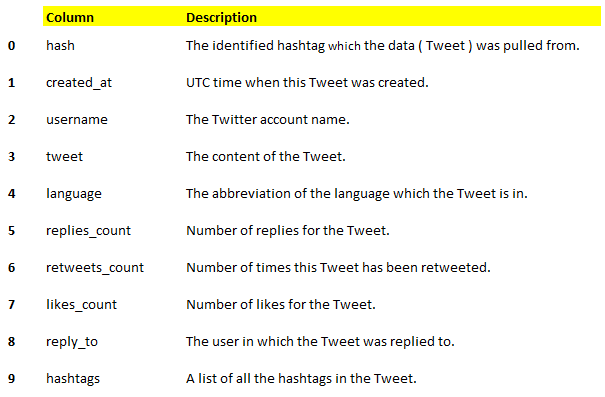

In [1183]:
#Range of values per column
df.agg([min,max]).T

,min,max
hash,#FightForHongKong,#standwithhongkong
created_at,2020-05-31 20:01:47 Eastern Daylight Time,2020-08-29 19:59:41 Eastern Daylight Time
username,0007_rakeshrai,zzzzz78395655
tweet,"https://t.co/00NUHE1cdc It would help, moving...",🪔1989 #TiananmenMassacre VIGIL🪔 #FightForFreed...
language,ar,zh
replies_count,0,3014
retweets_count,0,16023
likes_count,0,41413
reply_to,[],"[{'screen_name': 'zz_obey', 'name': 'MiMiMA.K'..."
hashtags,"['01july2020', 'internetvideo', 'hkpolicebruta...",[]


In [1184]:
#Checking for nulls
df.isnull().sum()

hash              0
created_at        0
username          0
tweet             0
language          0
replies_count     0
retweets_count    0
likes_count       0
reply_to          0
hashtags          0
dtype: int64

In [1185]:
#Checking the datatypes
df.dtypes

hash              object
created_at        object
username          object
tweet             object
language          object
replies_count      int64
retweets_count     int64
likes_count        int64
reply_to          object
hashtags          object
dtype: object

The `created_at` column is an object; I will convert it to `datetime`.

In [1186]:
new_date = df['created_at']
new_date = new_date.str.split(expand=True)
new_date = new_date[0]
new_date = pd.to_datetime(new_date)

In [1187]:
df['created_at'] = new_date
df.head(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,@benedictrogers @NOW4humanity Thanks for speak...,en,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']"
1,#FightForHongKong,2020-08-27,dani_tasso,Razzismo e democrazia. Sfaccettature del med...,it,1,0,2,[],"['blacklivesmatter', 'fightforhongkong', 'open..."


In [1188]:
df.dtypes

hash                      object
created_at        datetime64[ns]
username                  object
tweet                     object
language                  object
replies_count              int64
retweets_count             int64
likes_count                int64
reply_to                  object
hashtags                  object
dtype: object

In [1189]:
#count of unique values for every column, regardless of data type
df.nunique()

hash                  12
created_at            91
username           45111
tweet             221205
language              51
replies_count        217
retweets_count       881
likes_count         1110
reply_to           27555
hashtags           77715
dtype: int64

The `hash` number looks correct as that's how many hashtags were pulled.

In [1190]:
df['hash'].unique()

array(['#FightForHongKong', '#HongKongProtest', '#PrayForHongkong',
       '#WeAreNotAlone', '#nochinaextradition', '#standwithhongkong',
       '#hkprotests', '#freehongkong', '#hkpolicebrutality',
       '#hkpolicestate', '#HKpoliceterrorist', '#hkpoliceterrorism'],
      dtype=object)

The `created_at` number also looks correct as **3 months after the implimentation of the law was the range in which the tweets were pulled** .

In [1191]:
print('  ',df['created_at'].min(), ' | Beginning', '\n',
     ' ',df['created_at'].max(), ' | End')

   2020-05-31 00:00:00  | Beginning 
   2020-08-29 00:00:00  | End


The `username` number also makes sense.

In [1192]:
print('A single user on average tweeted',round(len(df) / len(df['username'].unique()),0), 'times in the course of 3 months.')

A single user on average tweeted 6.0 times in the course of 3 months.


Most of the others aren't important but I believe **the `tweet` number should align with the length of the data frame to ensure there are no duplicates.**

In [1193]:
print('There may be', "{:,}".format(len(df) - len(df['tweet'].unique())), 'duplicates to look into.')

There may be 67,211 duplicates to look into.


We will take a **look at where duplicates** may be found with the **`tweet` column**. Our initial focus is on **when a "tweeter"** (also known a person) **used multiple hashtags**.

A seperate data frame will be used to ensure the original is not compromised.

In [1194]:
df_tweets = df.copy()
df_tweets = pd.DataFrame(df_tweets)
len(df_tweets)

288416

In [1195]:
duplicated_tf = df_tweets.duplicated(subset=['tweet'])
duplicated_tf = pd.DataFrame(duplicated_tf)
len(duplicated_tf)

288416

In [1196]:
duplicated_tf.columns = ['Duplicated']
duplicated_tf.tail(3)

,Duplicated
288413,False
288414,False
288415,True


In [1197]:
num = {True:1,False:0}
duplicated_tf['Duplicated_TorF'] = duplicated_tf['Duplicated'].map(num)
duplicated_tf.tail(3)

,Duplicated,Duplicated_TorF
288413,False,0
288414,False,0
288415,True,1


In [1198]:
duplicated_tf = duplicated_tf.drop(columns=['Duplicated'])

In [1199]:
df_tweets_w_dup = pd.concat([df_tweets,duplicated_tf],
                    axis = 1, ignore_index=False)
df_tweets_w_dup = df_tweets_w_dup.reset_index(drop=True)

In [1200]:
df_tweets_w_dup.tail(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
288414,#hkpoliceterrorism,2020-05-31,bluedreamsplan2,@OzraeliAvi China try hard to link up the #Min...,en,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia...",0
288415,#hkpoliceterrorism,2020-05-31,jack83352493,#HongKongProtest #StandwithHK #HKPoliceTerrori...,und,0,0,0,[],"['hongkongprotest', 'standwithhk', 'hkpolicete...",1


In [1201]:
print(' Ensuring we have the same # of tweets after classification.','\n', 
      round((( ( len(df_tweets_w_dup) / len(df) ) - 1 ) * 100)), '| This should be a Zero change','\n',
     df_tweets_w_dup['Duplicated_TorF'].nunique(), '| The Duplicated Column should have 2 unique values 0,1')

 Ensuring we have the same # of tweets after classification. 
 0 | This should be a Zero change 
 2 | The Duplicated Column should have 2 unique values 0,1


Ok. Let's take a quick look at some of these duplicates.

In [1202]:
len(df_tweets_w_dup)

288416

In [1203]:
df_tweets_w_dup.loc[df_tweets_w_dup['Duplicated_TorF'] == 1].sort_values(by=['tweet'])

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
240604,#freehongkong,2020-06-28,lilacrhk,https://t.co/01A6CwhNfM #standardwithHK #Sta...,und,0,0,0,[],"['standardwithhk', 'standwithhongkong', 'freeh...",1
176495,#hkprotests,2020-06-20,jjjlll,https://t.co/1EqQV5LDL5 #HongKong #HKProtests...,und,0,0,2,[],"['hongkong', 'hkprotests', 'fightforfreedom', ...",1
261737,#hkpolicebrutality,2020-06-13,1238cheng,https://t.co/1kz5fmNGWx #StandWithHongKong #...,en,0,0,0,[],"['standwithhongkong', 'hkpolicebrutality']",1
174843,#hkprotests,2020-08-29,ksin1984,https://t.co/2FxZRKLRuf #save12hkyouth #Stan...,und,0,1,3,[],"['save12hkyouth', 'standwithhongkong', 'hkprot...",1
211971,#freehongkong,2020-07-17,lilacrhk,https://t.co/2Gao97jVzl #StandWithHongKong #...,und,0,0,0,[],"['standwithhongkong', 'standwithhk', 'freehong...",1
...,...,...,...,...,...,...,...,...,...,...,...
216138,#freehongkong,2020-07-13,oneeyeh,🤬🤬🤬🤬😭😭😭 #FreeHongKong #StandWithHongKong ht...,und,0,0,0,[],"['freehongkong', 'standwithhongkong']",1
280873,#hkpolicestate,2020-06-12,can_johnhk,🤯That’s just insane. He obviously thinks #Blac...,en,0,0,0,[],"['blacklivesmatter', 'hkpolicebrutality', 'hkp...",1
236528,#freehongkong,2020-07-01,nick86544272,🥂 #FreeHongKong #StandWithHongKong https://t...,und,0,0,0,[],"['freehongkong', 'standwithhongkong']",1
198442,#freehongkong,2020-08-07,kvckelvin123,🥲 #Policebruatlity #StandWithHongKong #FreeHon...,und,0,0,0,[],"['policebruatlity', 'standwithhongkong', 'free...",1


In [1204]:
len(df_tweets_w_dup)

288416

I would now like to **investigate the languages herein.**

<AxesSubplot:xlabel='Language Abbrevation', ylabel='# of observed Tweets'>

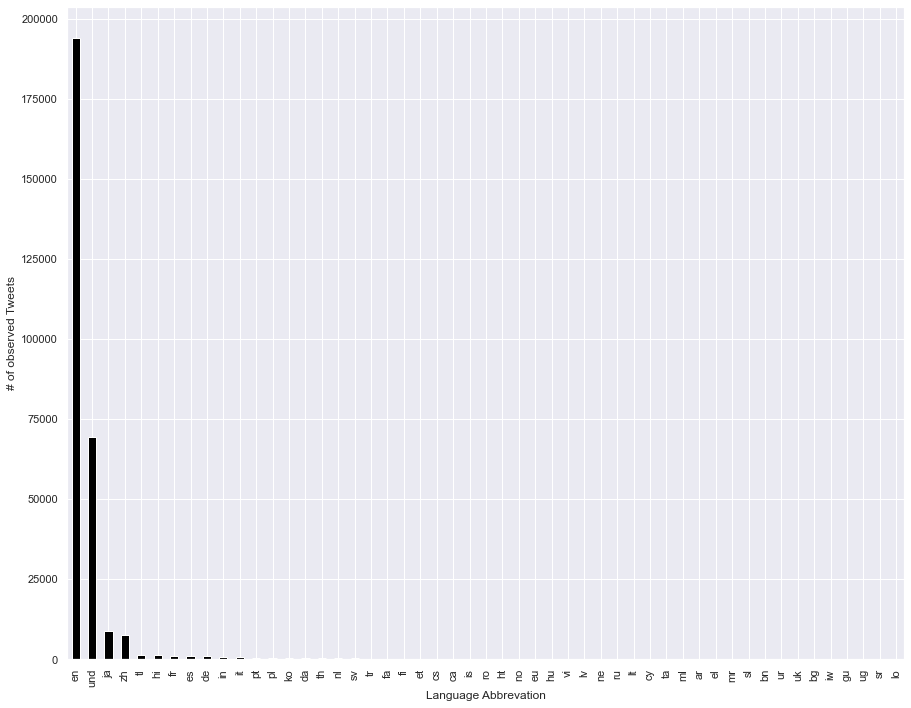

In [1205]:
sns.set_style('darkgrid')
lang = pd.value_counts(df_tweets_w_dup['language'].values, sort=True)
lang = lang.sort_values(ascending=False)
plt.subplots(figsize=(15, 12))
plt.ylabel('# of observed Tweets')
plt.xlabel('Language Abbrevation')
lang.plot.bar(color='black')

In [1206]:
df_tweets_w_dup['language'].value_counts().head(10)

en     194087
und     69375
ja       8715
zh       7327
tl       1254
hi       1207
fr       1046
es        908
de        892
in        507
Name: language, dtype: int64

In [1207]:
lang_count = df_tweets_w_dup['language']
round(lang_count.value_counts(normalize=True),2).head()

en     0.67
und    0.24
ja     0.03
zh     0.03
tl     0.00
Name: language, dtype: float64

**`en` & `und` is contributing 91%. While `zh`'s (Mandarin Chinese) contribution is only 3%, Mandarin Chinese is important; I will unfortunately have to pass as 3% is unlikely to move the analysis outcome.**

**`und` refers to unknown. I am unsure as to what implications removing would do. Let's see what is "unknown".**

In [1208]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'].head(25)

9       https://t.co/8lgfzmGtav   #lukashenko #Tikhan...
17     #FreeAgness #FightForFreedom #StandWithHongKon...
18     #Hongkongers  #hongkong #beijing #china #HongK...
20     #boycottchina #hongkong #freehk #boycottmulan ...
21      https://t.co/B5KWeYZE6t #boycottchina #hongko...
33     #umbrellamovement #hongkongprotest #hkhumanrig...
37            #FightForHongKong  https://t.co/C5dAXctB7X
39                   @yasmine_bw19 #FightForHongKong ✨✋🏼
40     #香港 #hongkong #hongkongprotest #hkprotest #黑警 ...
42     #白紙文宣行動  #白紙文宣 #whitepaperterror #fightforhong...
43     @StateDept @joshuawongcf @SecPompeo ✌️#FightFo...
44     @HongKongPLG @AngelineChanHK #UnitedWeStand  #...
48                                     #fightforHongkong
50     #Hongkongers  #hongkong #KnockoutBlow #beijing...
52                  #FightForHongKong  #HongKongProtests
55     #boycottchina #hongkong #freehk #boycottmulan ...
56     #boycottchina #hongkong #freehk #boycottmulan ...
71     #StandWithKashmir #FreeP

In [1209]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'][17]

'#FreeAgness #FightForFreedom #StandWithHongKong #fightforHONGKONG'

In [1210]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'][21]

' https://t.co/B5KWeYZE6t #boycottchina #hongkong #freehk #boycottmulan #saynotochina #boycottbeijing #chinazi #nochinaextradition #hongkongisnotchina #standagainsttyranny #fightfordemocracy #noextradictiontochina #policebrutality #standwithhk #fightforhongkong #endpolicebrutality'

In [1211]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'][39]

'@yasmine_bw19 #FightForHongKong ✨✋🏼'

These appear to be tweets with **only hashtags**; while that may be important & it's contribution is large, **this excerise pertains to the text.**

**Further investigation may be required** at a later date but for now, **we will unfortunately drop them as well & only keep `en`.**

In [1212]:
df_tweets_w_dup_en = df_tweets_w_dup[df_tweets_w_dup['language'].str.contains("en")]

In [1213]:
df_tweets_w_dup_en.tail()

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
288410,#hkpoliceterrorism,2020-06-01,andrewhe2,@SpokespersonCHN Ms Hua please help them. #ICa...,en,0,0,0,"[{'screen_name': 'SpokespersonCHN', 'name': 'H...","['icantbreathe', 'icantbreath', 'icantbreathea...",1
288411,#hkpoliceterrorism,2020-06-01,bluedreamsplan2,Don't fall into the trap! #HKPoliceTerrorism #...,en,0,0,0,[],"['hkpoliceterrorism', 'hongkongpolicestate', '...",0
288412,#hkpoliceterrorism,2020-06-01,villafish129,@KingJames #AllLivesMatters . #PoliceBrutality...,en,0,0,0,"[{'screen_name': 'KingJames', 'name': 'LeBron ...","['alllivesmatters', 'policebrutality', 'police...",1
288413,#hkpoliceterrorism,2020-05-31,dingdin34098358,@ajphelo @HK55020097 The HK police killed a So...,en,0,1,1,"[{'screen_name': 'ajphelo', 'name': 'Andrew J ...","['policebrutality', 'hkpoliceterrorism']",0
288414,#hkpoliceterrorism,2020-05-31,bluedreamsplan2,@OzraeliAvi China try hard to link up the #Min...,en,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia...",0


In [1214]:
print('There may be', "{:,}".format(len(df) - len(df['tweet'].unique())), 'duplicates to look into.')

There may be 67,211 duplicates to look into.


In [1215]:
print('Review of the # of English articles:','\n'
    '  ',"{:,}".format( len(df_tweets_w_dup[df_tweets_w_dup.language == 'en'])), '| English count before dropping other languages','\n',
     ' ',"{:,}".format(len(df_tweets_w_dup_en)),'| Count after dropping other languages')

Review of the # of English articles: 
   194,087 | English count before dropping other languages 
   194,087 | Count after dropping other languages


That matches the above so **we will now remove duplicates.**

In [1216]:
df_tweets_wout_dup_en = df_tweets_w_dup_en[df_tweets_w_dup_en['Duplicated_TorF']==0]

Confirming that worked we will bring the data frame that did not delete the duplicates back & see what the sum of the `Duplicates_TorF` column is; as a reminder, **a duplicate has a 1 & the non-Duplicate has a 0.**

In [1217]:
sum(df_tweets_w_dup_en['Duplicated_TorF'])

30388

So there was ~30k identified duplicates, so what is the length of the dataframe without duplicates.

In [1218]:
sum(df_tweets_wout_dup_en['Duplicated_TorF'])

0

In [1219]:
duplicated_tf_next = df_tweets_wout_dup_en.duplicated(subset=['tweet'])
duplicated_tf_next = pd.DataFrame(duplicated_tf_next)
duplicated_tf_next.columns = ['Duplicated_check']
duplicated_tf_next.Duplicated_check.unique()

array([False])

**A complete list of False essentially says there are no duplicates.**

In [1220]:
len(df_tweets_wout_dup_en)

163699

That's yet another cut albeit it's expected given the source in which we are working with.

**We will take a look at what percent of the original total we have left.**

In [1221]:
round((( len(df_tweets_wout_dup_en) / len(df) ) * 100),2 )

56.76

**Before sending the Dataframe to Regex, we will hold on to it on the side for reference.**

In [1222]:
cd

C:\Users\rands


In [1223]:
df_tweets_wout_dup_en.to_excel('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_tweets_wout_dup_en.xlsx')
print('Finished')

Finished


# 1.4 Regex<a id='regex'></a>

Before moving forwards, **we will send the `df_tweets_wout_dup_en` back to it's home ( `df` )** so we don't have to use a long name.

In [1224]:
df = df_tweets_wout_dup_en

In [1225]:
print('  ',"{:,}".format(len(df_tweets_wout_dup_en)), '| the length of the temp dataframe.','\n',
     ' ', "{:,}".format(len(df)), '| the length of our new dataframe.')

   163,699 | the length of the temp dataframe. 
   163,699 | the length of our new dataframe.


In [1226]:
df.isnull().sum()

hash               0
created_at         0
username           0
tweet              0
language           0
replies_count      0
retweets_count     0
likes_count        0
reply_to           0
hashtags           0
Duplicated_TorF    0
dtype: int64

That was already believed but it's good practice to double confirm.

<a id='dupe'></a>**`Duplicated_TorF` | Given we dropped all 1's from the column, we can drop it.** Before, we will double confirm.

In [1227]:
np.unique(df['Duplicated_TorF'])

array([0], dtype=int64)

In [1228]:
df = df.drop(columns=['Duplicated_TorF'])

<a id='lang'></a>**`language` | We will do the same with `language`**.

In [1229]:
np.unique(df['language'])

array(['en'], dtype=object)

In [1230]:
df = df.drop(columns=['language'])

<a id='oum'></a>**`Mentions to Other Users` |** We would like to remove from **`tweets`any mentions to other `usernames` which aren't necessary**. Take a **look at:
   * ginny81025554's comment towards @benedictrogers** & **@NOW4humanity** 

**We don't want those words;** we will now **remove mentions to other users.**

In [1231]:
df[['hash', 'created_at', 'username', 'tweet']].head(1)

,hash,created_at,username,tweet
0,#FightForHongKong,2020-08-28,ginny81025554,@benedictrogers @NOW4humanity Thanks for speak...


In [1232]:
df['tweet'] = df['tweet'].str.replace("@[A-Za-z0-9]+","")

In [1233]:
df[['hash', 'created_at', 'username', 'tweet']].head(1)

,hash,created_at,username,tweet
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks for speaking up for us #fridaysforfre...


<a id='htmltags'></a>**`html tags` |** The **next items to remove are `html tags`**. Take a look at an example below. 

In [1234]:
df['tweet'][391]

' https://t.co/Pp6LQJKGgL  Ridiculous things happened and will keep happening in Hong Kong.  #StandWithHongKong  #FreeHongKong  #HongKongProtest'

In [1235]:
df['tweet'] = df['tweet'].str.replace(r'http\S+', '')

In [1236]:
df['tweet'][391]

'   Ridiculous things happened and will keep happening in Hong Kong.  #StandWithHongKong  #FreeHongKong  #HongKongProtest'

<a id='tweethash_tags'></a>**Tweet hastags |** Tweet hashtags are **hashtags found within the tweet & in many cases used to complete sentences. We would like to ensure this does not have an impact on model performance.** These hashtags should not be confused with the `hash` column; that column is for record keeping to confirm which hashtag was used to identify relevent `tweet`s for our project.

**We will use an example from Joshua Wong (joshuawongcf)**, a notable Hong Kong activist turned politician. **Our decision to use Joshua herein should not be interpreted as showing preference or support for his cause.**

**Our decision to use a tweet from Joshua, is based on his tendency to structure tweets in the manner outlined above.**

In [1237]:
df['tweet'][174973]

"[HK asylum seekers could be sent to #China's secret courts]  1. Twelve #HKers, all involved in #hkprotests, were detained by #China’s coast guard today when fleeing to #Taiwan for political asylum. All of them are now detained in #China.  "

**There you may see that the following hashtags will be converted to the below once the hashtag is removed:**:
   * #China --> China
   * #HKers --> HKers
   * #hkprotests --> hkprotests
   * #Taiwan --> Taiwan


<a id='emojis'></a>**Emojis |** Emoji or Emojis are pictograms, logograms, ideograms and smileys used in electronic messages and web pages. **They are relevant & their intentions should be preserved;** two examples shown below;
   * One where the emoji is seperated from
   * Another where it is not

**We would like to ensure that the new `emoji word` is not connected with another word.**

In [1238]:
df['tweet'][22]

'Heartbreaking...😭 we have to do whatever we can do to #FightForHongKong  #StandWithHongKong'

In [1239]:
df['tweet'][425]

'#Yellow Sunday🥰🥰🥰#SupportAppleDaily #WeNeedAppleDaily #YellowEconomicCircle #黃色經濟圈 #5DemandsNot1Less #StandWithHongKong #StandwithHK #FightForFreedom #SupportYellowEconomicCircle #YellowEconomy  #HongKong #HongKongProtesters #HongKongProtest #HongKongProtests #HongKonger  '

We must first build the required `def` variable to **convert the emojis to text**.

In [1240]:
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', " "+"_".join(Emoji_Dict[emot].replace(","," ").replace(":"," ").split())+" ", text)
    return text

In [1241]:
df['tweet'] =  df.tweet.apply(lambda x: convert_emojis_to_word(x))

In [1242]:
df['tweet'][22]

'Heartbreaking... loudly_crying_face  we have to do whatever we can do to #FightForHongKong  #StandWithHongKong'

<a id='profanity'></a>**Profanity |** The data frame should not contain profanity; **I will replace profanity with the word `NEGATIVE`**. I will not show examples of what was replaced herein for professional reasons.

Similar to the emoji section, we will first **need to establish a `def variable` to handle profanity.**

This **`def variable` will assign a bad word to the word NEGATIVE** to ensure **it holds weight for NLP.**

In [1243]:
prof_word = 'NEGATIVE'

def clean_text(__main__):
    if __name__ == "__main__":
        text = __main__
        censor_text = profanity.censor(text, '%')
        censor_text = re.sub('%%%%','NEGATIVE',censor_text)
        return censor_text

In [1244]:
print(' For transparency purposes, the word',prof_word,'has a length of',len(prof_word),'characters.','\n'
      ' All profanity words are treated equally, irrespective of their word lengths.')

 For transparency purposes, the word NEGATIVE has a length of 8 characters. 
 All profanity words are treated equally, irrespective of their word lengths.


In [1245]:
df['tweet'] =  df.tweet.apply(lambda x: clean_text(x))

In [1246]:
df['tweet'][900]

'  #FreeHongKong NEGATIVE china #HKIndependence  #HongKong  #Hongkongprotest'

<a id='flanguage'></a>**Foreign Languages |** Despite limiting our languages to `en`, foreign languages remain; notably Chinese characters. We will translate them to English.

In [1247]:
# !pip install googletrans==3.1.0a0

In [1248]:
# import pandas as pd
# from googletrans import Translator

In [1249]:
# d={"city_trad_chinese":["香港特别行政区", "澳门特别行政区", "北京市", "上海市"]}

In [1250]:
# df = pd.DataFrame(data=d)

In [1251]:
# translator=Translator()

In [1252]:
# df["City_English"] = df["city_trad_chinese"].map(lambda x: translator.translate(x, src="zh-TW", dest='en').text)

<a id='sia'></a>**Sentiment Intensity Analyzer |** Here we will score the tweets based the words they used; sometimes call ' opinion mining'.

We will take a look at Sentiment Analysis in a **the process of ‘computationally’ determining the the percent probabilities of whether a tweet is one of the below**: 
   * Positive, 
   * Negative or 
   * Neutral

It’s also known as opinion mining, deriving the opinion or attitude of the "tweeter". **The probabilities will add up to 100%.**

In [1253]:
analyzer = SentimentIntensityAnalyzer()

In [1254]:
df.columns

Index(['hash', 'created_at', 'username', 'tweet', 'replies_count',
       'retweets_count', 'likes_count', 'reply_to', 'hashtags'],
      dtype='object')

In [1255]:
df.head(3)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks for speaking up for us #fridaysforfre...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']"
2,#FightForHongKong,2020-08-25,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor..."
3,#FightForHongKong,2020-08-24,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor..."


In [1256]:
#We will assign the tweets to a new dataframe & then put it back to the main one at the end
df_sentiment_tweet = pd.DataFrame(df['tweet'].copy())
df_sentiment_tweet['comp'] = [analyzer.polarity_scores(x)['compound'] for x in df_sentiment_tweet['tweet']]
df_sentiment_tweet['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_sentiment_tweet['tweet']]
df_sentiment_tweet['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_sentiment_tweet['tweet']]
df_sentiment_tweet['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_sentiment_tweet['tweet']]

In [1257]:
df_sentiment_tweet.head(2)

,tweet,comp,neg,neu,pos
0,Thanks for speaking up for us #fridaysforfre...,0.4404,0.000,0.707,0.293
2,How to stop China in Hong Kong. Read the new r...,-0.2960,0.071,0.929,0.000


In [1258]:
df_sentiment_tweet.describe()

,comp,neg,neu,pos
count,163699.000000,163699.000000,163699.000000,163699.000000
mean,0.095112,0.102677,0.728057,0.169265
std,0.534434,0.124905,0.164872,0.161290
min,-0.990100,0.000000,0.078000,0.000000
25%,-0.361200,0.000000,0.616000,0.000000
50%,0.077200,0.065000,0.725000,0.144000
75%,0.539900,0.179000,0.835000,0.270000
max,0.998900,0.897000,1.000000,0.922000


In [1259]:
# df_sentiment_tweet = df_sentiment_tweet.drop(columns=['tweet'])

In [1260]:
df = pd.merge(df, df_sentiment_tweet, on='tweet')
# df = df.drop(columns = ['key_0'], axis=1)

In [1261]:
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks for speaking up for us #fridaysforfre...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000


Complete.

<a id='stop_words'></a>**Stop Words |** We will now remove stop words from the tweet.

In [1262]:
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks for speaking up for us #fridaysforfre...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000


In [1263]:
# here we will assign a new dataframe to pull out stop words & then reassign it back at the end.
df_tweet_stopwords_remove = pd.DataFrame(df['tweet'])
df_tweet_stopwords_remove.head(2)

,tweet
0,Thanks for speaking up for us #fridaysforfre...
1,How to stop China in Hong Kong. Read the new r...


In [1264]:
df_tweet_stopwords_remove = df_tweet_stopwords_remove['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_tweet_stopwords_remove = pd.DataFrame(df_tweet_stopwords_remove)
df_tweet_stopwords_remove.head(2)

,tweet
0,Thanks speaking us #fridaysforfreedom #fightfo...
1,How stop China Hong Kong. Read new report Dani...


**Looks like it worked** comparing the dataframe above to the dataframe prior to `stop word` removal.

Now to push back to the main dataframe.

In [1265]:
df.tweet = df_tweet_stopwords_remove.tweet

In [1266]:
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000


<a id='word_stem'></a>**Stemming |** Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

In [1267]:
# First Cleaning the text; this was done in the previous section but to double confirm
def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [1268]:
df_temp_stemmed = pd.DataFrame(df['tweet'].copy())

In [1269]:
df_temp_stemmed['tweet_nostop'] = df_temp_stemmed['tweet'].apply(lambda x: clean_text(x.lower()))
df_temp_stemmed.head(2)

,tweet,tweet_nostop
0,Thanks speaking us #fridaysforfreedom #fightfo...,"[thanks, speaking, us, fridaysforfreedom, figh..."
1,How stop China Hong Kong. Read new report Dani...,"[stop, china, hong, kong, read, new, report, d..."


In [1270]:
# Stemming the text
def stemming(token_text):
    text = [ps.stem(word) for word in token_text]
    return text

In [1271]:
df_temp_stemmed['tweet_stemmed'] = df_temp_stemmed['tweet_nostop'].apply(lambda x: stemming(x))
df_temp_stemmed[['tweet_nostop','tweet_stemmed']].head(2)

,tweet_nostop,tweet_stemmed
0,"[thanks, speaking, us, fridaysforfreedom, figh...","[thank, speak, us, fridaysforfreedom, fightfor..."
1,"[stop, china, hong, kong, read, new, report, d...","[stop, china, hong, kong, read, new, report, d..."


In [1272]:
print('A quick check to ascertain if the data frames are of equal length; the number below should be Zero:','\n',
     len(df_temp_stemmed) - len(df))

A quick check to ascertain if the data frames are of equal length; the number below should be Zero: 
 0


Great let's move it into its home.

In [1273]:
df_temp_stemmed = df_temp_stemmed.drop(columns=['tweet_nostop'])

In [1274]:
df_temp_stemmed = df_temp_stemmed.drop(columns=['tweet'])
df_temp_stemmed.head(1)

,tweet_stemmed
0,"[thank, speak, us, fridaysforfreedom, fightfor..."


In [1275]:
df['tweet_stemmed'] = df_temp_stemmed.tweet_stemmed

In [1276]:
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293,"[thank, speak, us, fridaysforfreedom, fightfor..."
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"[stop, china, hong, kong, read, new, report, d..."


<a id='word_lem'></a>**Lemmatization |** We will now add a Lemmatization column on the tweets.

In [1277]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [1278]:
tweet_lem = pd.DataFrame(df['tweet'].copy())

In [1279]:
tweet_lem['tweet_lemmatized'] = tweet_lem.tweet.apply(lemmatize_text)
tweet_lem[['tweet','tweet_lemmatized']].head(2)

,tweet,tweet_lemmatized
0,Thanks speaking us #fridaysforfreedom #fightfo...,"[Thanks, speaking, u, #fridaysforfreedom, #fig..."
1,How stop China Hong Kong. Read new report Dani...,"[How, stop, China, Hong, Kong., Read, new, rep..."


In [1280]:
df['tweet_lemmatized'] = tweet_lem.tweet_lemmatized

In [1281]:
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293,"[thank, speak, us, fridaysforfreedom, fightfor...","[Thanks, speaking, u, #fridaysforfreedom, #fig..."
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"[stop, china, hong, kong, read, new, report, d...","[How, stop, China, Hong, Kong., Read, new, rep..."


<a id='tweet_length'></a>**tweet length |** Adding another column to see the length of tweets.

In [1282]:
df_t_length = pd.DataFrame([df['tweet'].copy()]).T
df_t_length = df_t_length.convert_dtypes()
df_t_length['word_l'] = [len(x.split()) for x in df['tweet'].tolist()]
df_t_length = df_t_length.drop(columns=['tweet'])
df['#_words_tweet'] = df_t_length

In [1283]:
df.head(3)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293,"[thank, speak, us, fridaysforfreedom, fightfor...","[Thanks, speaking, u, #fridaysforfreedom, #fig...",5
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"[stop, china, hong, kong, read, new, report, d...","[How, stop, China, Hong, Kong., Read, new, rep...",25
2,#FightForHongKong,2020-08-24,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"[stop, china, hong, kong, read, new, report, d...","[How, stop, China, Hong, Kong., Read, new, rep...",25


<a id='num_hashtags'></a>**Number of hashtags |** Adding another column to see how many hashtags were used.

In [1284]:
df_hash_num = pd.DataFrame([df['hashtags'].copy()]).T
df_hash_num = df_hash_num.convert_dtypes()
df_hash_num['hash_l'] = [len(x.split()) for x in df['hashtags'].tolist()]
df_hash_num = df_hash_num.drop(columns=['hashtags'])
df['#_hashtags'] = df_hash_num

In [1285]:
df.head(2)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,comp,neg,neu,pos,tweet_stemmed,tweet_lemmatized,#_words_tweet,#_hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks speaking us #fridaysforfreedom #fightfo...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",0.4404,0.000,0.707,0.293,"[thank, speak, us, fridaysforfreedom, fightfor...","[Thanks, speaking, u, #fridaysforfreedom, #fig...",5,2
1,#FightForHongKong,2020-08-25,peterhjorth_ddp,How stop China Hong Kong. Read new report Dani...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",-0.2960,0.071,0.929,0.000,"[stop, china, hong, kong, read, new, report, d...","[How, stop, China, Hong, Kong., Read, new, rep...",25,13


<a id='word_v_tfid'></a>**TfidfVectorizer |** With the help of the `"scikit-learn family"`, Term Frequency Inverse Document Frequency; a common algorithm to transform text into a meaningful representation of numbers which we can use to fit machine algorithms for prediction.

In [1286]:
def create_document_term_matrix(tweet_list,vectorizer):
    doc_term_matrix = vectorizer.fit_transform(tweet_list)
    return DataFrame(doc_term_matrix.toarray(),
                    columns=vectorizer.get_feature_names())

#initiate the TfidfVectorizer
tfidf_vec = TfidfVectorizer(min_df=0.00005, max_df=0.99995)

In [1287]:
df_tdif = pd.DataFrame(df['tweet'])
df_tdif_series = df_tdif.squeeze()
df_tdif_df = pd.DataFrame(create_document_term_matrix(df_tdif_series,tfidf_vec))

In [1288]:
print('Looks like we found {:,.2f}'.format(round(df_tdif_df.shape[1] - df.shape[1])),'unique words.')

Looks like we found 5,153.00 unique words.


In [1336]:
df_tdif_df.head(2)

,00,000,01,06,07,08,09,10,100,1000,...,香港デモ,香港人,香港人加油,香港加油,香港国安法,香港国家安全法,香港獨立唯一出路,香港警察,黃色經濟圈,黑警
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Given the size of this temporary data frame, we will split it into multiple dataframes so we don't overload the concat process.

In [1314]:
df_tdif_df_test_first = df_tdif_df.iloc[:, -2585:].copy()
df_tdif_df_test_first.head(2)

,is,isis,island,isn,israel,issue,issued,issues,istandwithhongkong,it,...,香港デモ,香港人,香港人加油,香港加油,香港国安法,香港国家安全法,香港獨立唯一出路,香港警察,黃色經濟圈,黑警
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1331]:
df_tdif_df_test_second = df_tdif_df.iloc[:, :200].copy()  # It was 2586 & cut in half again & added one
df_tdif_df_test_second.head(2)

,00,000,01,06,07,08,09,10,100,1000,...,_srp,_taiwan,_taskforce,_tsuruno,_uk,_un,_us,_watch,_with_hk,_wonghki
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1333]:
# df_tdif = pd.concat([df, df_tdif_df_test_first], axis=1)

In [ ]:
df_tdif = pd.concat([df, df_tdif_df_test_second], axis=1)

In [ ]:
df_tdif.head(2)

In [ ]:
df_tdif.tail(2)

In [ ]:
print(' A double check to confirm that there was no overlap; the following number should be Zero:','\n',
     (news_article_tdif.shape[1]-news_article_tdif_df.shape[1]-news_article.shape[1]))

<a id='word_v_count'></a>**CountVectorizer |** With the `"scikit-learn family"`, the CountVectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [ ]:
# Re-establishing it
count = CountVectorizer()

In [ ]:
df.head(1)

In [ ]:
# Making a copy, turning it into an array & confirming based on the first 3
df_cvec_temp = pd.DataFrame(df['tweet'].copy())
df_cvec_temp = df_cvec_temp.values
# I won't print it as it will be long

In [ ]:
# Create the bag of words feature matrix
bow_tweet = count.fit_transform(df_cvec_temp.ravel())

In [ ]:
# Show feature matrix
bow_tweet.toarray()

In [ ]:
# Get feature names
feature_names = count.get_feature_names()

When we do a check on the data frame after we send it there, we never see the middle portion, so we will check the Top ~5 & Bottom ~5 of the array for reference.

In [ ]:
# Top 5 feature names
feature_names[:5]

In [ ]:
# Bottom 5 feature names
feature_names[-5:]

In [ ]:
df_cvec = pd.DataFrame(bow_tweet.toarray(), columns=feature_names)
df_cvec.head(3)

In [ ]:
df_cvec = pd.concat([df, df_cvec], axis=1)

In [ ]:
df_cvec.head(2)

<a id='title_cvec'></a>**Putting the Tweet with CountVec Data to the Side** | Potential review on the side if applicable.

In [ ]:
cd

In [ ]:
df_cvec.to_excel('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_cvec.xlsx')
print('Finished')

# **1.5 Putting the Data to the Side**<a id='pts'></a>

**Here we will put the data as it stands to the side**. The date just started its "journey" but it's nice to keep track of where it came from as we move along.

In [ ]:
cd

In [ ]:
df_tdif.to_excel('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_tdif.xlsx')
print('Finished')

# **2.0 Exploratory Data Analysis (EDA)**<a id='eda'></a>

# **2.1 Contents**<a id='eda_contents'></a>

This is where you will summarize your intent. Mention you used `twint`

In [ ]:
df.describe()

The **above are the numeric columns**. We will set a **new variable** to the side for the next section.

In [ ]:
df_num =df[['replies_count','retweets_count','likes_count','#_words_tweet','#_hashtags']].copy()

Histograms are an excellent way to review the range and density of values for each numeric features in the data set.

In [ ]:
sns.set_style('darkgrid')
df_num.hist(bins = 25,figsize=(20,20))

In [ ]:
#Anamolies & Outliers - Review boxplots
df_num.boxplot(vert=False, grid=False, fontsize=15, figsize=(10,10))

In [ ]:
#Explore data relationships
sns.pairplot(df_num)


In [ ]:
#Heat map - Correlation between features
plt.subplots(figsize=(15,10))
matrix = np.triu(df_num.corr())
sns.heatmap(df_num.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Twitter Numeric Heatmap')

The key observations here are as follows:

**Positive Correlation**
   * `Retweets` | Have a strong correlation with Likes which makes sense
      * People usually don't retweet something they don't like
   * `Replies` | Also have a strong correlation with Likes
      * Most likely in the same rational

**No correlation**
   * `# of hashtags` | No correlation with replies, retweets or likes
      * May go against the logic of expanding your viewership by expanding the # of hashtags

**We will also take a visual look at the Tweets contribution to the data frame**.

In [ ]:
sns.set_style('darkgrid')
# Moving the number of tweets into a seperate column to identify usage
twits = pd.DataFrame(df_tweets_wout_dup_en['hash'].value_counts())

# Taking a look visually
plt.figure(figsize=(15, 6))
twits.plot.barh()
plt.show()

twits['hash_pct'] = round((( twits.hash / twits.hash.sum() ) * 100),2)
twits

The **top 2 seem to control the data frame**, shy of **~90% in 2 tweets**; simple math but would like to understand it for later use / **this is for reference.**

In [ ]:
twits['hash_pct']['#standwithhongkong'] + twits['hash_pct']['#freehongkong']

In [ ]:
# df['likes_count'].describe()

**Time |** We will now see **if anything has changed during the three (3) months after the law was introduced.**

As a reminder, that was **1 June 2020.**

In [ ]:
df_time = df.copy()
df_time['count'] = int(1)
df_time_daily = df_time.groupby('created_at').agg('sum')
df_time_daily = df_time_daily.reset_index()

In [ ]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="created_at", y="count", data=df_time_daily)

x_dates = df_time_daily['created_at'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

ax.set(xlabel="Day Tweeted", ylabel = "Total Number of Tweets", title='# of Tweets over time')

In [ ]:
df_time_daily['count'].describe()

In [ ]:
n = 0.95
outers = df_time_daily[df_time_daily['count'] > df_time_daily['count'].quantile(n)]

print('  There were notable outliers in the',round((n*100),0),'percentile with', "{:,}".format(df_time_daily['count'].quantile(n)), 'tweets between the following dates:')
print('\n',outers[['created_at','count']],'\n','\n',
      'It may be interesting to see what was happening at those two periods.')

**Rand | This is what I would like to convert the above bar chart too**

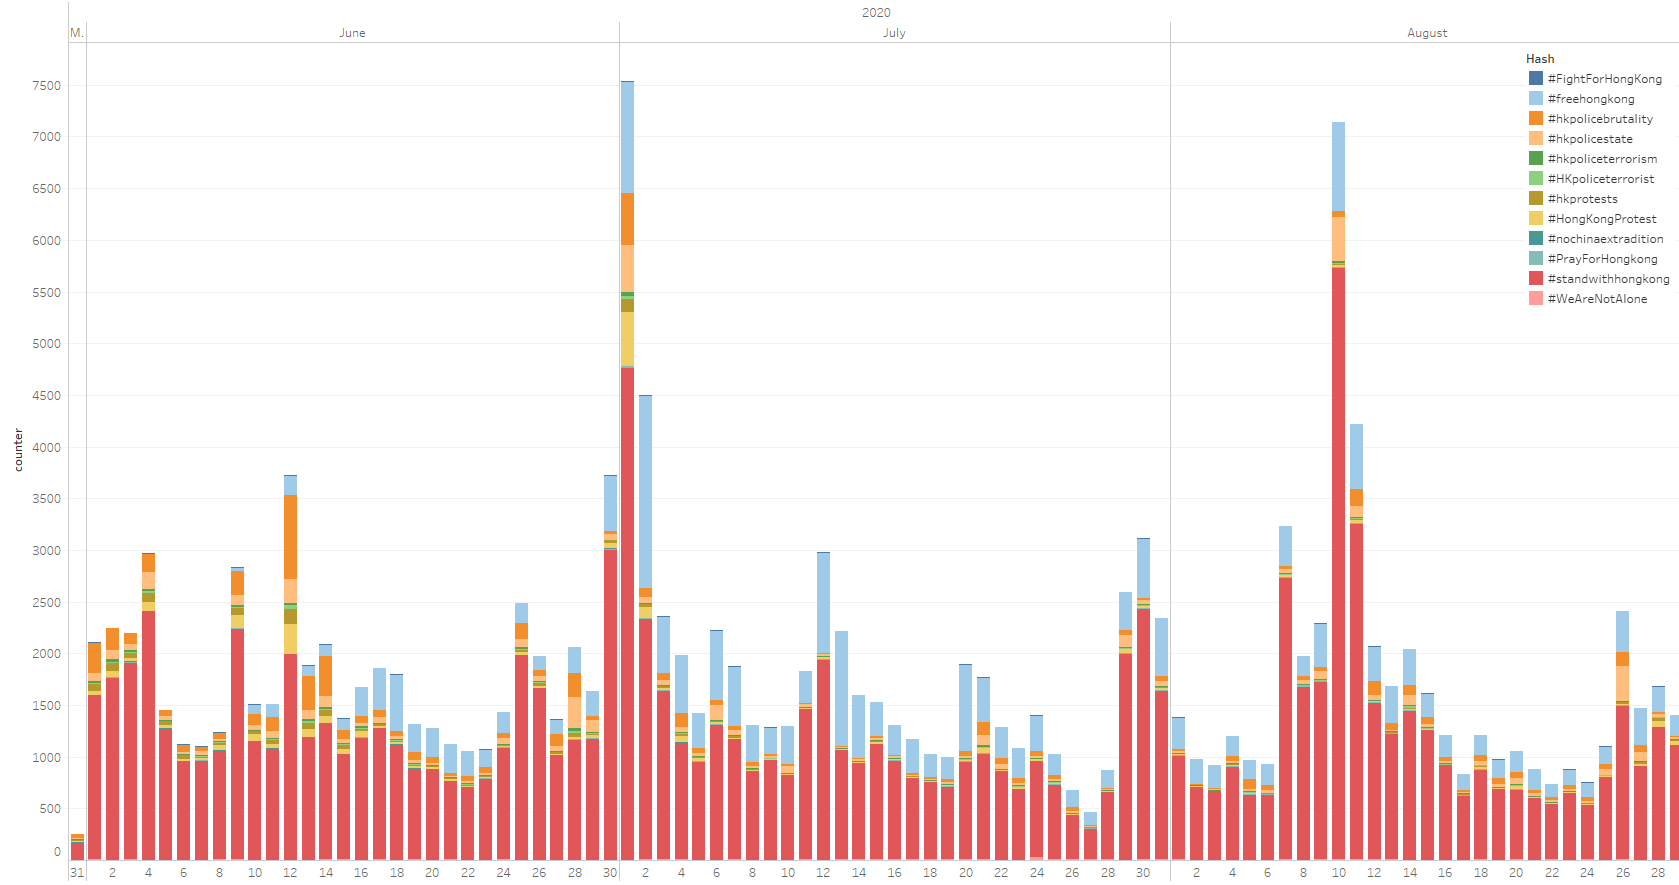

In [ ]:
df_time_daily.columns

In [ ]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="created_at", y="likes_count", data=df_time_daily)

x_dates = df_time_daily['created_at'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

ax.set(xlabel="Day Tweeted", ylabel = "Total Number of Likes", title='# of Tweet Likes over time')

Looking at the total number of likes, it looks pretty similar to tweet count.

In [ ]:
df_time_daily.columns

In [ ]:
df_time_daily.head(2)